<a href="https://colab.research.google.com/github/hasali-coder/Anti-money-Laundering-EDA/blob/main/FiFa_Football_Analytics_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing the necessarry libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

In [4]:
#reading in the data 
df_points_table = pd.read_csv("points_table.csv")
df_points_table.head()

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Manchester City,38,29,6,3,99,26,73,93
1,2,Liverpool,38,28,8,2,94,26,68,92
2,3,Chelsea,38,21,11,6,76,33,43,74
3,4,Tottenham Hotspur,38,22,5,11,69,40,29,71
4,5,Arsenal,38,22,3,13,61,48,13,69


In [5]:
df_points_table.isnull().sum()

Pos     0
Team    0
Pld     0
W       0
D       0
L       0
GF      0
GA      0
GD      0
Pts     0
dtype: int64

In [6]:
df_points_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pos     20 non-null     int64 
 1   Team    20 non-null     object
 2   Pld     20 non-null     int64 
 3   W       20 non-null     int64 
 4   D       20 non-null     int64 
 5   L       20 non-null     int64 
 6   GF      20 non-null     int64 
 7   GA      20 non-null     int64 
 8   GD      20 non-null     int64 
 9   Pts     20 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.7+ KB


In [7]:
#creating averages 
df_points_table["GF_Avg"]=(df_points_table['GF']/df_points_table['Pld'])
df_points_table["GA_Avg"]=(df_points_table['GA']/df_points_table['Pld'])

df_points_table.head()

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,GF_Avg,GA_Avg
0,1,Manchester City,38,29,6,3,99,26,73,93,2.605263,0.684211
1,2,Liverpool,38,28,8,2,94,26,68,92,2.473684,0.684211
2,3,Chelsea,38,21,11,6,76,33,43,74,2.000000,0.868421
3,4,Tottenham Hotspur,38,22,5,11,69,40,29,71,1.815789,1.052632
4,5,Arsenal,38,22,3,13,61,48,13,69,1.605263,1.263158


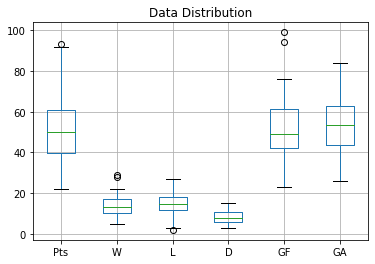

In [8]:
box_pt = df_points_table.boxplot(column = ['Pts','W','L','D','GF','GA'])
plt.title('Data Distribution')
box_pt.plot()
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

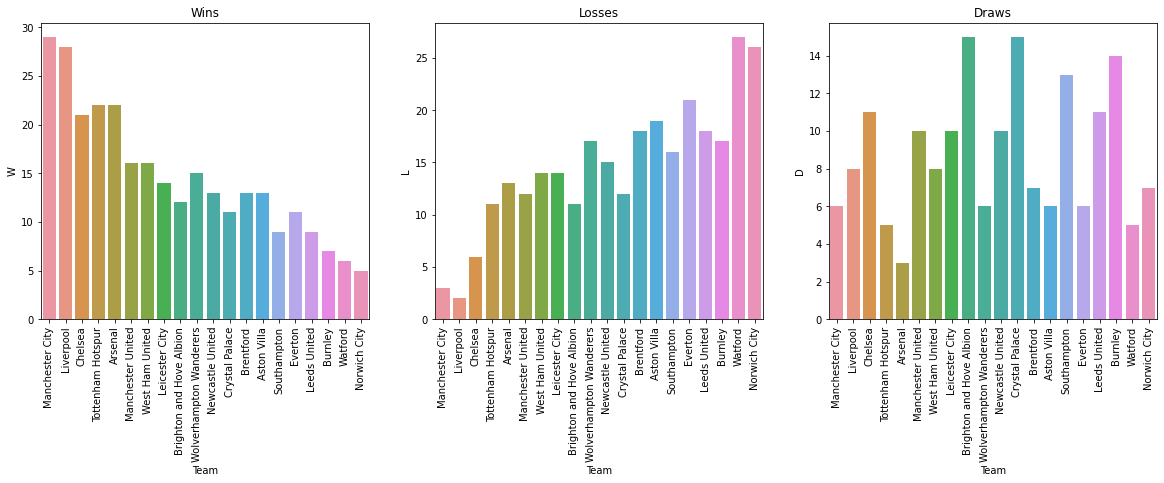

In [10]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x='Team',y='W',data=df_points_table).set_title('Wins')
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.barplot(x='Team',y='L',data=df_points_table).set_title('Losses')
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.barplot(x='Team',y='D',data=df_points_table).set_title('Draws')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

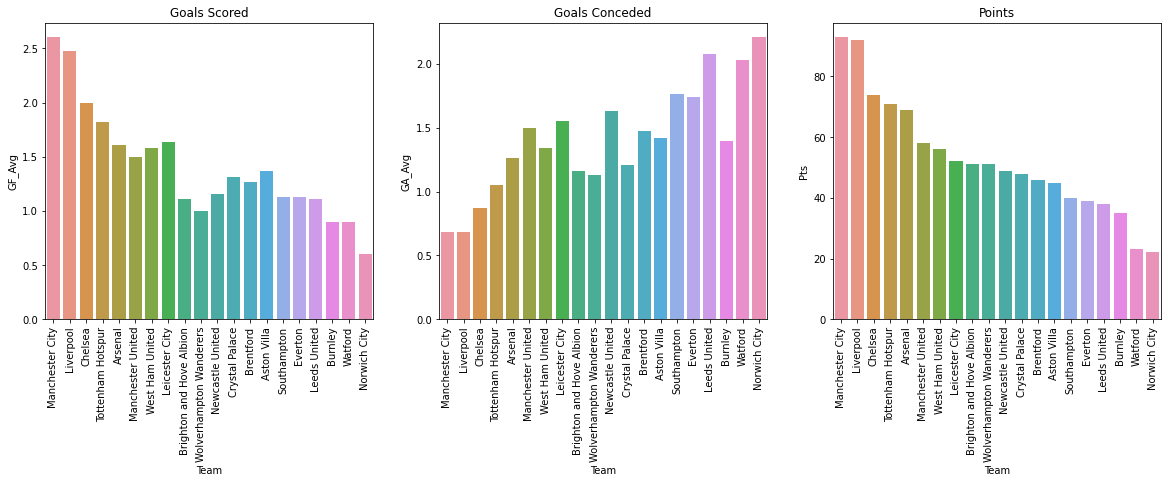

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x='Team',y='GF_Avg',data=df_points_table).set_title('Goals Scored')
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.barplot(x='Team',y='GA_Avg',data=df_points_table).set_title('Goals Conceded')
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.barplot(x='Team',y='Pts',data=df_points_table).set_title('Points')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

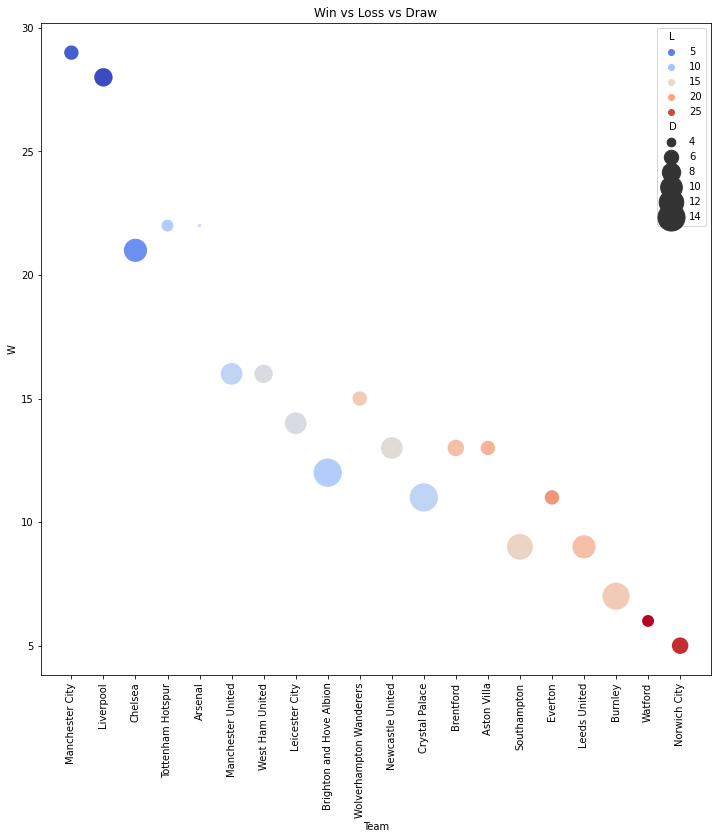

In [12]:
plt.subplots(figsize=(12, 12))
sns.scatterplot(x="Team", y="W",
                hue="L", size="D",
                palette="coolwarm",
                sizes=(10, 800), linewidth=0,
                data=df_points_table).set_title("Win vs Loss vs Draw")
plt.xticks(rotation=90)

In [13]:
ptg = df_points_table.drop([ 'Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF_Avg','GA_Avg'],axis=1)
ptg.head()

,GF,GA,GD,Pts
0,99,26,73,93
1,94,26,68,92
2,76,33,43,74
3,69,40,29,71
4,61,48,13,69


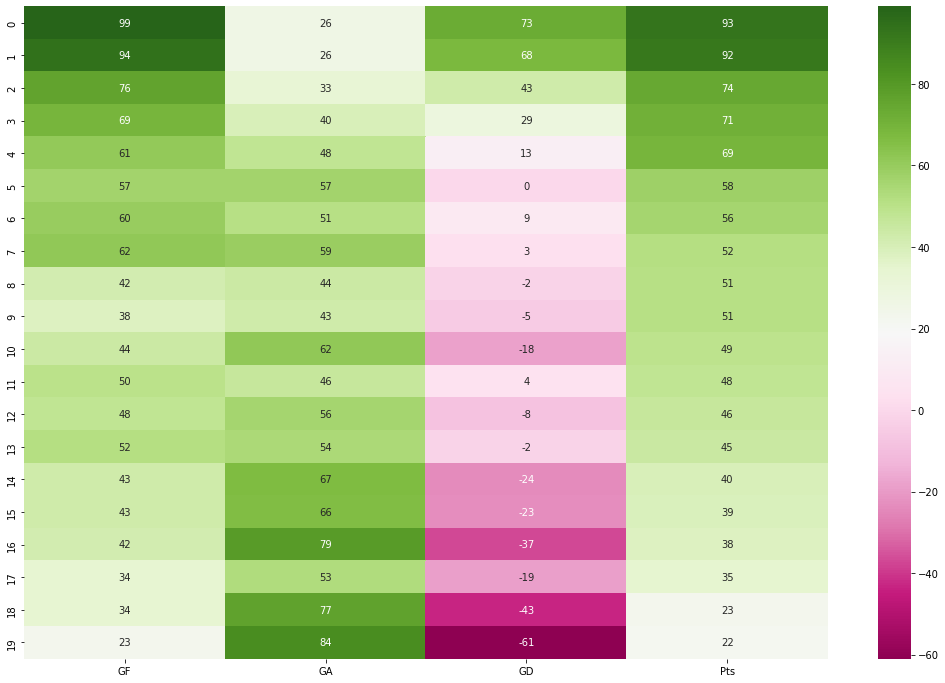

In [14]:
cor=ptg.corr
plt.figure(figsize=(18, 12))

sns.heatmap(ptg,annot=True,cmap="PiYG")